**Simulated Annealing (SA)** is a **probabilistic optimization algorithm** inspired by the **annealing process in metallurgy**, where a material is heated and then slowly cooled to reduce defects and minimize its energy state.

### 🔍 Purpose:
Simulated Annealing is used to **find an approximate global optimum** of a function, especially when the search space is large and contains many local optima. It's particularly useful for **combinatorial optimization problems**.

---

### 🧠 Key Idea:

Unlike greedy algorithms that always move toward better solutions, Simulated Annealing allows **occasional moves to worse solutions** with a certain probability. This helps it **escape local minima/maxima** and potentially find the **global optimum**.

The probability of accepting worse solutions **decreases over time**, mimicking the cooling schedule in annealing.

---

### ⚙️ Algorithm Steps:

1. **Initialize:**
   - Start with an initial solution $ S $
   - Set an initial temperature $ T $ (usually high)
   - Define a cooling schedule (how fast the temperature decreases)

2. **Iterate:**
   - While not yet converged (or until temperature is low enough):
     1. Generate a neighboring solution $ S' $
     2. Compute cost difference:  
        $ \Delta E = f(S') - f(S) $
     3. If $ \Delta E < 0 $ (i.e., better solution):  
        Accept $ S' $
     4. Else (worse solution):  
        Accept $ S' $ with probability  
        $ P = \exp(-\Delta E / T) $
     5. Decrease the temperature $ T $

3. **Return** the best solution found

---

### 📈 Acceptance Probability:

The probability of accepting a worse solution is:

$$
P = \exp\left(\frac{-\Delta E}{T}\right)
$$

- When **temperature $ T $** is high → more likely to accept worse solutions
- As $ T $ decreases → less likely to accept worse moves

---

### 🧪 Applications:

- Traveling Salesman Problem (TSP)
- Circuit layout design
- Job scheduling
- Protein structure prediction
- Machine learning hyperparameter tuning

---

### ✅ Advantages:

- Simple to implement
- Can escape local optima
- Works well for large, complex search spaces

### ❌ Disadvantages:

- Can be slow to converge
- Performance depends on parameter tuning (initial temperature, cooling rate, etc.)

---

### 🔄 Variants & Improvements:

- Adaptive Simulated Annealing (ASA)
- Fast simulated annealing
- Quantum annealing (in quantum computing)

---


In [4]:
import random
import math

In [5]:
# Generate random cities (coordinates)
def generate_cities(n):
    return [(random.random(), random.random()) for _ in range(n)]

In [6]:
generate_cities(5)

[(0.7027399113499901, 0.271324511143888),
 (0.9506901412597139, 0.5700130185490322),
 (0.44398898218143557, 0.5743429930130103),
 (0.5465464769483162, 0.1677775760244341),
 (0.7183538268845412, 0.1514388753276369)]

In [ ]:
# Compute distance between two cities
def distance(city1, city2):
    return math.hypot(city1[0] - city2[0], city1[1] - city2[1])

In [14]:
distance([0,0], [2,2])

2.8284271247461903

In [15]:
8 ** 0.5

2.8284271247461903

In [16]:
# Compute total path length
def total_distance(path, cities):
    return sum(distance(cities[path[i]], cities[path[i+1]]) for i in range(len(path)-1)) + \
           distance(cities[path[-1]], cities[path[0]])

In [17]:
# Generate a neighboring solution (swap two cities)
def get_neighbor(solution):
    new_solution = solution[:]
    i, j = random.sample(range(len(new_solution)), 2)
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

In [18]:
get_neighbor([1,2,3,4,5])

[1, 2, 4, 3, 5]

In [19]:
# Simulated Annealing Algorithm
def simulated_annealing(cities, initial_temp=1000, cooling_rate=0.995, max_iter=1000):
    n = len(cities)
    current_solution = list(range(n))
    current_cost = total_distance(current_solution, cities)

    best_solution = current_solution[:]
    best_cost = current_cost

    temp = initial_temp

    for iteration in range(max_iter):
        neighbor = get_neighbor(current_solution)
        neighbor_cost = total_distance(neighbor, cities)
        delta = neighbor_cost - current_cost

        if delta < 0 or random.random() < math.exp(-delta / temp):
            current_solution = neighbor
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_solution = current_solution[:]
                best_cost = current_cost

        temp *= cooling_rate

    return best_solution, best_cost

In [20]:
# Example usage
num_cities = 10
cities = generate_cities(num_cities)
best_path, best_length = simulated_annealing(cities)

print("Best Path:", best_path)
print("Total Distance:", best_length)

Best Path: [1, 0, 6, 4, 7, 5, 3, 2, 9, 8]
Total Distance: 3.0317364005328287


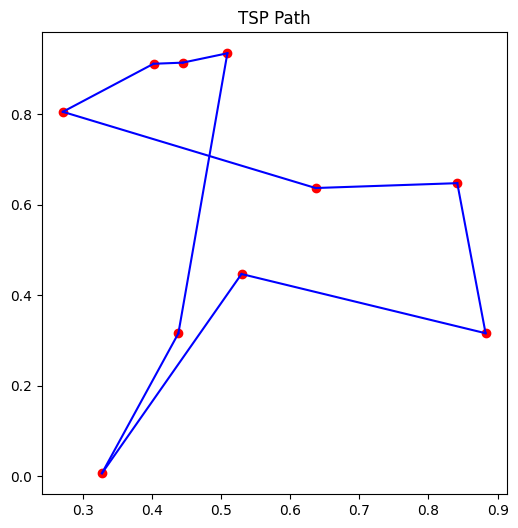

In [21]:
import matplotlib.pyplot as plt

def plot_path(cities, path):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]

    plt.figure(figsize=(6,6))
    plt.scatter(x, y, c='red')

    for i in range(len(path)):
        start = path[i]
        end = path[(i+1) % len(path)]
        plt.plot([x[start], x[end]], [y[start], y[end]], 'b')

    plt.title("TSP Path")
    plt.show()

plot_path(cities, best_path)